In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

In [2]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/intel-image-classification/seg_train/seg_train', label_mode='categorical', image_size=(128, 128))

Found 14034 files belonging to 6 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

In [5]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [6]:
data = data.map(lambda x, y: (x/255, y))

In [7]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [23]:
model.compile(optimizer=Adam(learning_rate=.001), loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 16)       

In [25]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
307/307 [==============================] - 78s 248ms/step - loss: 1.7087 - accuracy: 0.5146 - val_loss: 1.2728 - val_accuracy: 0.6027
Epoch 2/10
307/307 [==============================] - 75s 245ms/step - loss: 1.2941 - accuracy: 0.5772 - val_loss: 1.2101 - val_accuracy: 0.6153
Epoch 3/10
307/307 [==============================] - 74s 240ms/step - loss: 1.2274 - accuracy: 0.6050 - val_loss: 1.1615 - val_accuracy: 0.6272
Epoch 4/10
147/307 [=============>................] - ETA: 33s - loss: 1.1998 - accuracy: 0.6137

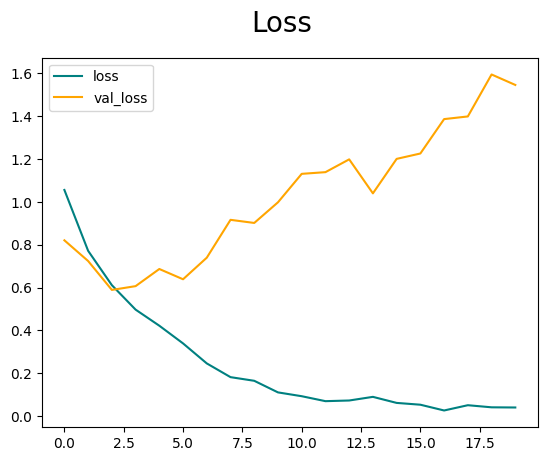

In [16]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

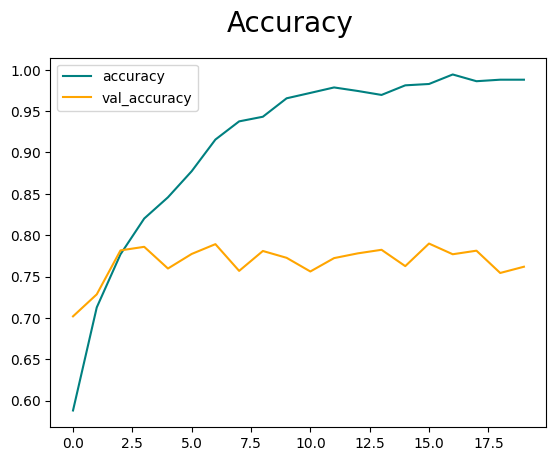

In [17]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision: {precision.result()},\nRecall: {recall.result()},\nAccuracy: {accuracy.result()}')